# Descriptive Statistics

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
gt = pd.read_csv('CSVs/globalterrorism.csv')
display(gt.shape)
gt.head()

(43793, 19)

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,attacktype,attacktype_txt,targtype,targtype_txt,band_name,npeople_attacking,weapon,weapon_txt,nkill
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,1,Assassination,4,Military,Other,1,5,Firearms,2
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,3,Bombing/Explosion,20,Unknown,Other,2,6,Explosives,2
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,1,Assassination,14,Private Citizens & Property,Other,7,5,Firearms,1
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,2,Armed Assault,3,Police,Other,3,5,Firearms,1
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,2,Armed Assault,3,Police,Other,40,5,Firearms,1


In [13]:
gt.dtypes

iyear                  int64
imonth                 int64
iday                   int64
more_than_24h          int64
country_txt           object
city                  object
latitude             float64
longitude            float64
news                  object
suicide                int64
attacktype             int64
attacktype_txt        object
targtype               int64
targtype_txt          object
band_name             object
npeople_attacking      int64
weapon                 int64
weapon_txt            object
nkill                  int64
dtype: object

In [14]:
desc = gt[['npeople_attacking', 'nkill']].copy()
desc.describe()

,npeople_attacking,nkill
count,43793.000000,43793.000000
mean,13.376156,4.701025
std,44.069149,17.604601
min,1.000000,1.000000
25%,3.000000,1.000000
50%,6.000000,2.000000
75%,19.000000,4.000000
max,5000.000000,1570.000000


,iyear,imonth,iday,more_than_24h,latitude,longitude,suicide,attacktype,targtype,npeople_attacking,weapon,nkill
iyear,1.000000,-0.087005,0.012200,-0.010576,0.001671,0.093500,-0.000105,0.063306,-0.041899,0.023337,0.045109,-0.013061
imonth,-0.087005,1.000000,0.004321,-0.000827,0.013000,0.009918,0.002963,0.014004,0.003654,0.024997,0.010999,-0.001267
iday,0.012200,0.004321,1.000000,-0.012176,0.017640,0.018773,-0.001090,0.003899,-0.002798,-0.002205,-0.000235,-0.009590
more_than_24h,-0.010576,-0.000827,-0.012176,1.000000,-0.048072,-0.017486,-0.058486,0.259191,0.026309,0.066442,0.113201,0.057604
latitude,0.001671,0.013000,0.017640,-0.048072,1.000000,-0.010223,0.105877,0.031278,-0.012670,-0.033032,0.017108,-0.003853
longitude,0.093500,0.009918,0.018773,-0.017486,-0.010223,1.000000,-0.053155,-0.049843,-0.051201,-0.003362,-0.051449,-0.065184
suicide,-0.000105,0.002963,-0.001090,-0.058486,0.105877,-0.053155,1.000000,0.000110,-0.052566,-0.080658,-0.022006,0.120082
attacktype,0.063306,0.014004,0.003899,0.259191,0.031278,-0.049843,0.000110,1.000000,0.055661,0.041818,0.773809,0.062711
targtype,-0.041899,0.003654,-0.002798,0.026309,-0.012670,-0.051201,-0.052566,0.055661,1.000000,-0.001869,0.035225,0.016924
npeople_attacking,0.023337,0.024997,-0.002205,0.066442,-0.033032,-0.003362,-0.080658,0.041818,-0.001869,1.000000,0.029062,0.059401


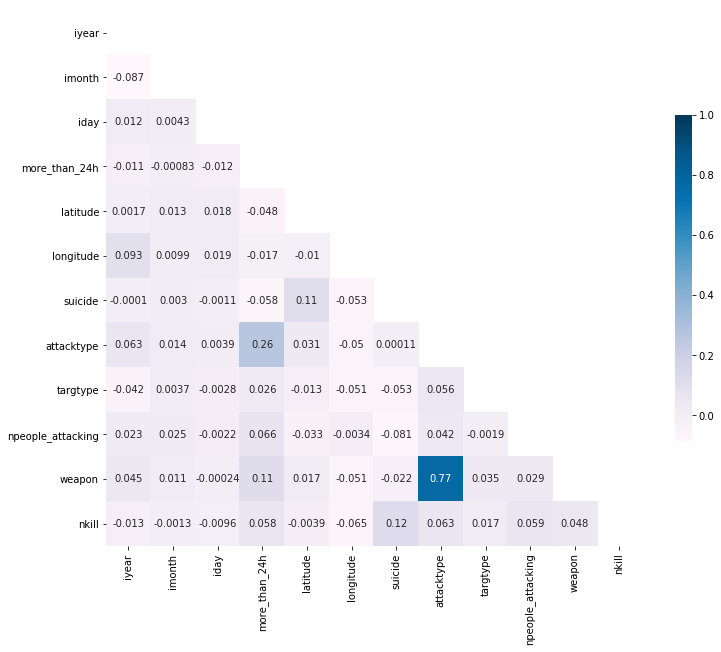

In [15]:
corr = gt.corr()
display(corr)


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, cmap='PuBu', square=True, cbar_kws={"shrink": .5}, annot=True)

Text(0.5, 0, 'Number of people')

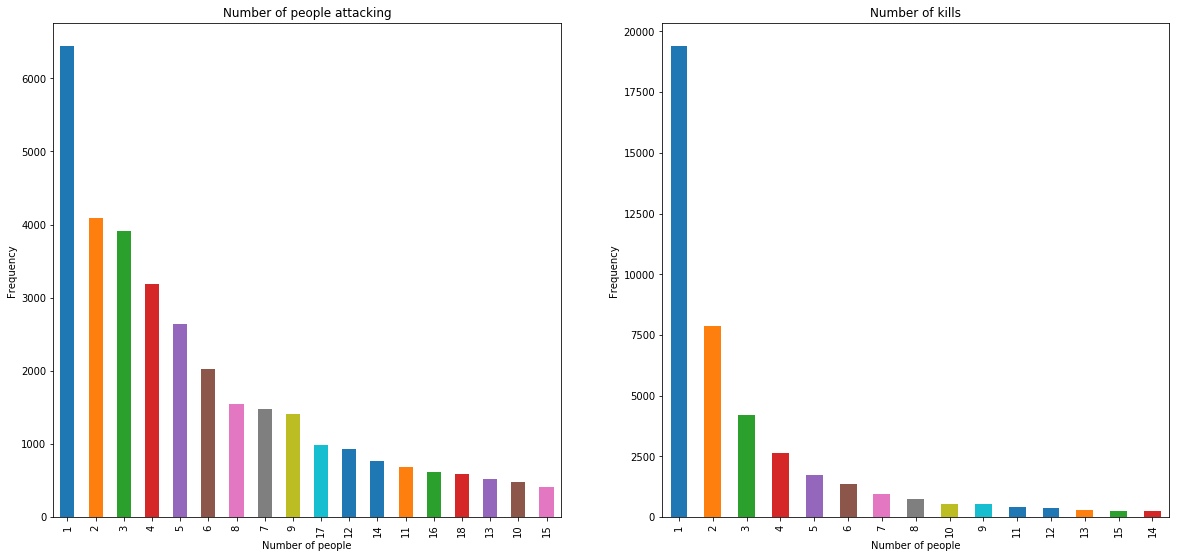

In [16]:
# Column-wise data distribution - is the distribution skewed? Yes, right-skewed

gtn = gt[gt['npeople_attacking'] < gt['npeople_attacking'].quantile(0.75)]
gtp = gt[gt['nkill'] < gt['nkill'].quantile(0.95)]

f, axs = plt.subplots(figsize=(20,20))

plt.subplot(2, 2, 1)
axs = gtn['npeople_attacking'].value_counts().plot(kind = 'bar')
plt.title('Number of people attacking')
plt.ylabel('Frequency')
plt.xlabel('Number of people')

plt.subplot(2, 2, 2)
axs = gtp['nkill'].value_counts().plot(kind = 'bar')
plt.title('Number of kills')
plt.ylabel('Frequency')
plt.xlabel('Number of people')

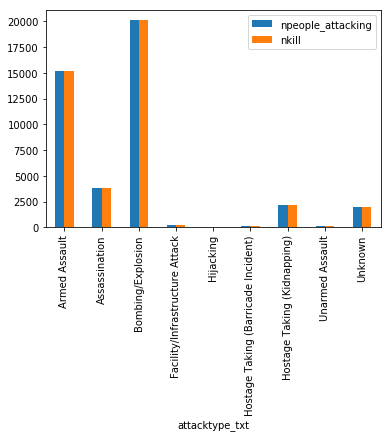

In [17]:
gt[["npeople_attacking", "nkill"]].groupby(gt['attacktype_txt']).count().plot.bar()

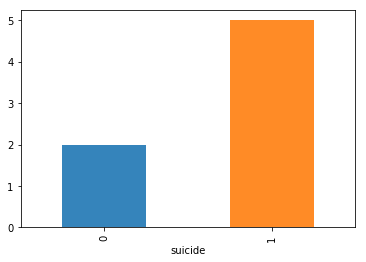

In [18]:
n_suicide = gt['nkill'].groupby(gt['suicide']).median().sort_values()
n_suicide.plot(kind = 'bar', alpha = 0.9)

Text(0.5, 0, 'Number of people (median)')

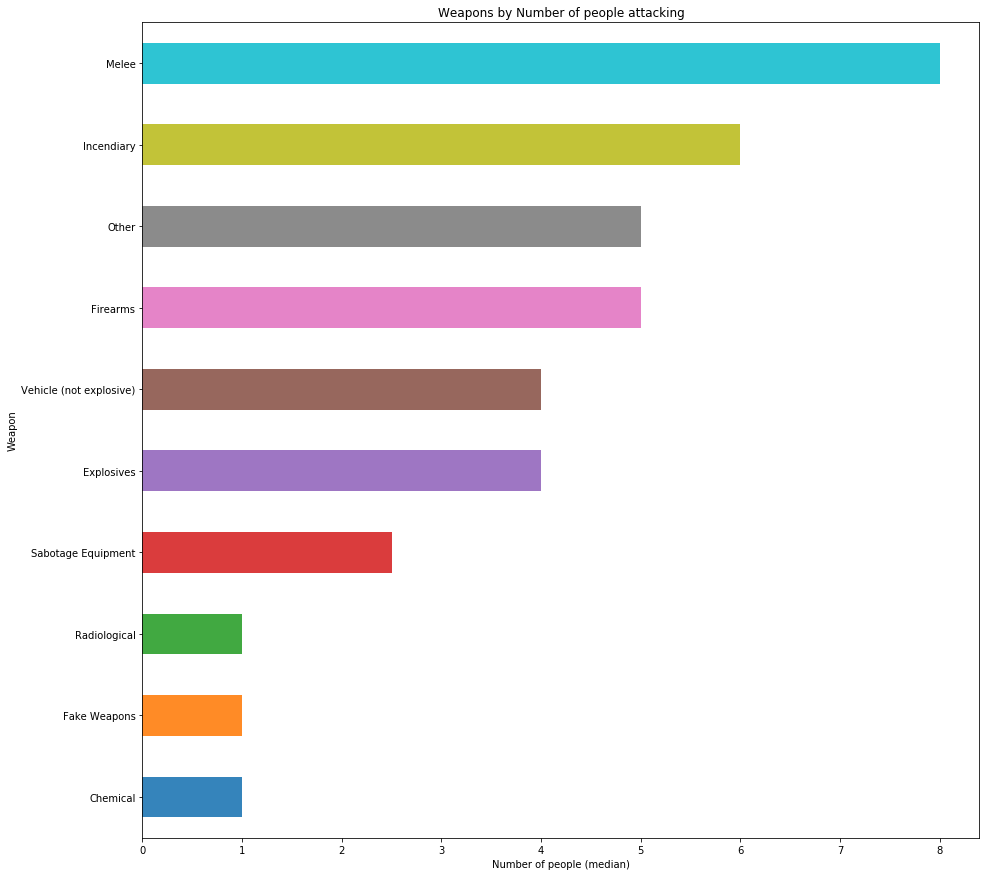

In [27]:
# Number of people attacking - Weapons & Attack Type 

gta = gt.drop(gt[gt.weapon_txt == 'Unknown'].index)
gtb = gt.drop(gt[gt.attacktype_txt == 'Unknown'].index)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(1, 1, 1)
axs = gta['npeople_attacking'].groupby(gta['weapon_txt']).median().sort_values().plot(kind = 'barh', alpha = 0.9)
plt.title('Weapons by Number of people attacking')
plt.ylabel('Weapon')
plt.xlabel('Number of people (median)')

Text(0.5, 0, 'Number of people (median)')

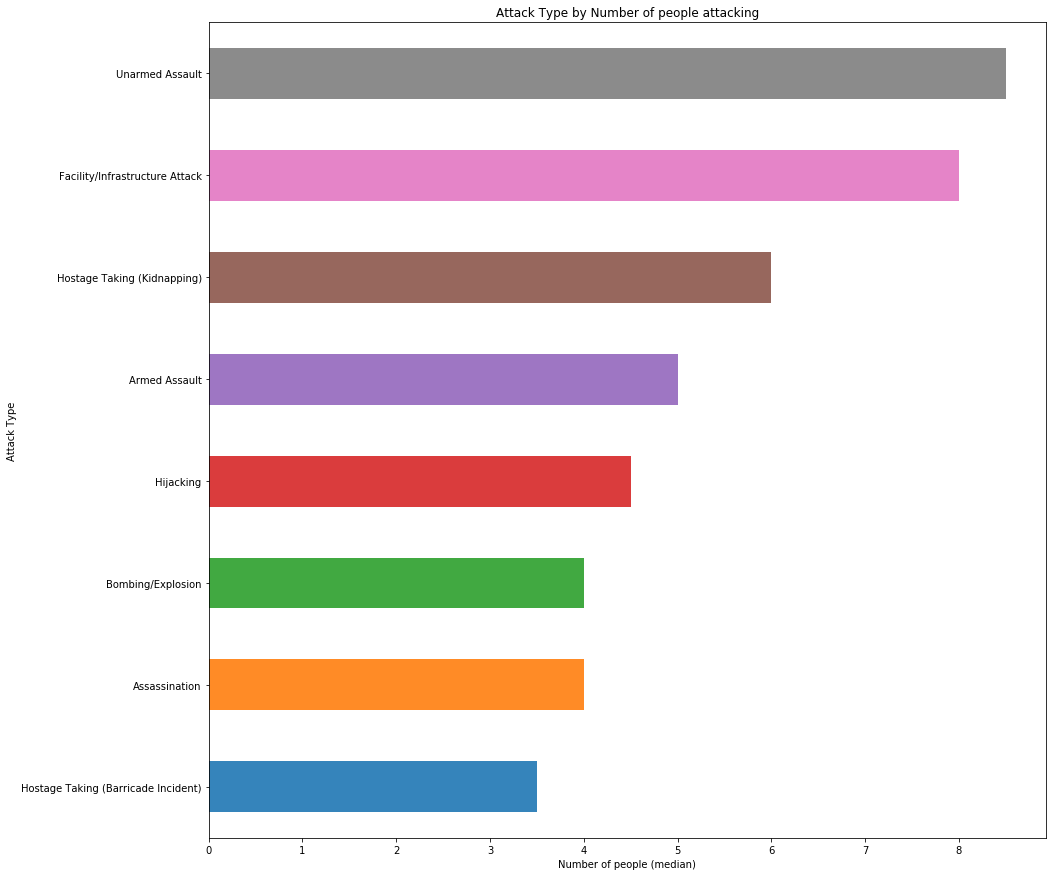

In [28]:
f, axs = plt.subplots(figsize=(15,15))

plt.subplot(1, 1, 1)
axs = gtb['npeople_attacking'].groupby(gtb['attacktype_txt']).median().sort_values().plot(kind = 'barh', alpha = 0.9)
plt.title('Attack Type by Number of people attacking')
plt.ylabel('Attack Type')
plt.xlabel('Number of people (median)')

In [31]:
#gtc = gt.drop(gt['country_txt'].value_counts().tail(138)).copy()

#gtc[["iyear", "country_txt", "targtype"]].groupby(["iyear", "country_txt"]).unstack("country_txt").plot(figsize = (15, 10))



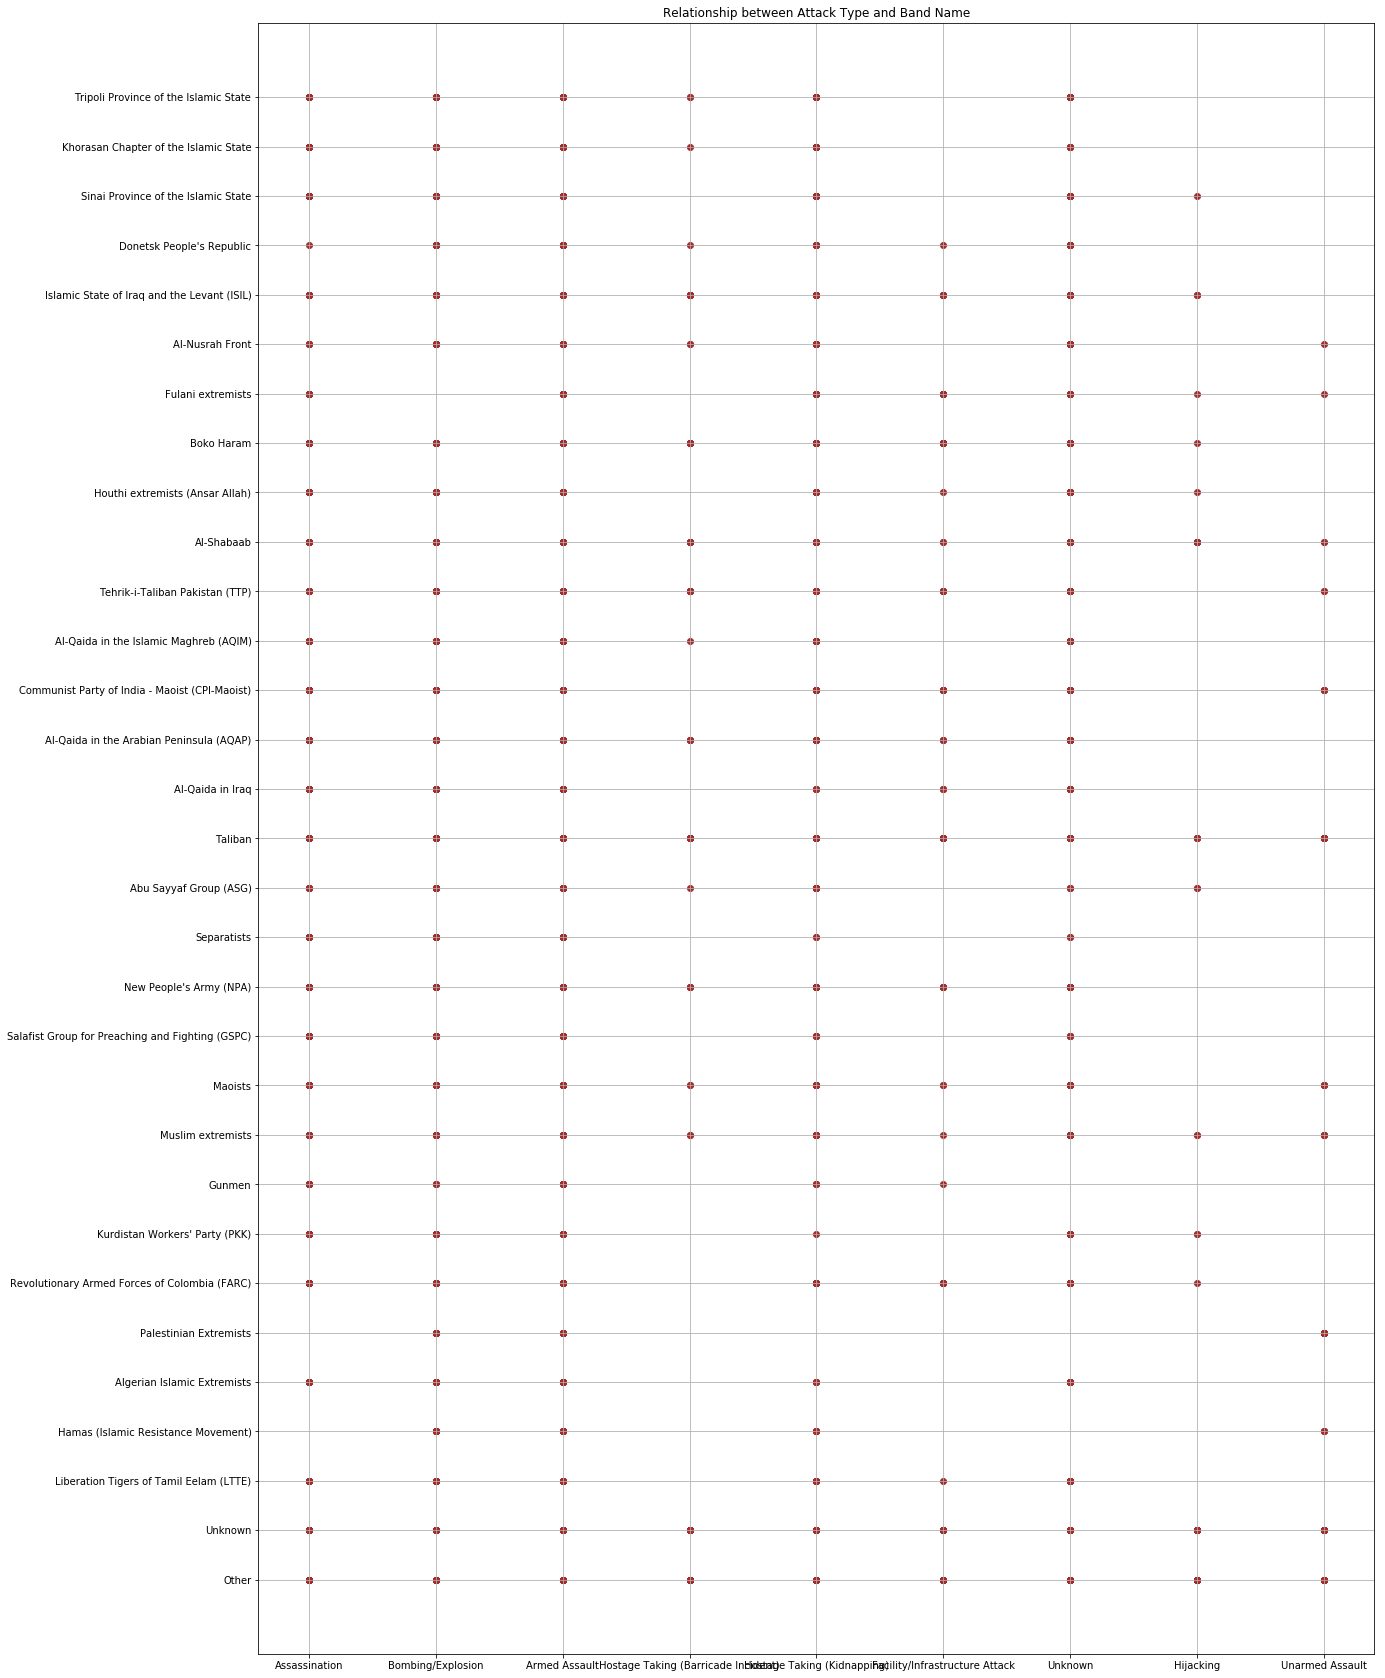

In [20]:
fig, axes = plt.subplots(figsize = (20,30))

plt.scatter(x = 'attacktype_txt', y = 'band_name', data = gt, color="brown")
#plt.ylabel("Age")
#plt.xlabel("Fare")
plt.title("Relationship between Attack Type and Band Name")
plt.grid()

In [ ]:
# year - attack type

In [ ]:
# band name - weapon / attack type

In [ ]:
# number of kills - target type / band name

### DataSet with Sentiment

In [29]:
gt = pd.read_csv('CSVs/globalterrorism10000.csv')
display(gt.shape)
gt.head(50)

(10000, 42)

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,...,vehicl,suspect,suicid,iraq,civilian,islam,taliban,pakistan,maoist,india
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,...,0,1,0,0,0,0,0,0,0,0
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,...,0,1,0,0,0,0,0,0,0,0
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,...,1,0,0,0,0,0,0,0,0,0
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,...,0,1,0,0,0,0,0,0,0,0
5,1970,5,15,0,United States,Seattle,47.610786,-122.331306,"5/15/1970: Larry G. Ward, an African American,...",0,...,0,0,0,0,0,0,0,0,0,0
6,1970,5,22,0,United States,St. Paul,44.946604,-93.136446,5/22/1970: Police Officer James Sackett is mur...,0,...,0,0,0,0,0,0,0,0,0,0
7,1970,6,19,0,United States,Chicago,41.842602,-87.681229,"6/19/1970: Bruce Sharp and William Redwine, bo...",0,...,0,0,0,0,0,0,0,0,0,0
8,1970,6,19,0,United States,San Francisco,37.755363,-122.443352,6/19/1970: Police Officer Richard Radetich was...,0,...,0,0,0,0,0,0,0,0,0,0
9,1970,6,30,0,United States,Plainfield,40.617623,-74.417061,"6/30/1970: Two policemen, Robert M. Perry and ...",0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Gráfico sentimen

In [30]:
gt.npeople_attacking.value_counts()

1       1852
2       1119
4       1110
3        954
5        694
6        682
7        566
9        447
8        359
11       298
13       272
12       263
10       211
15       186
20       172
30       147
18       106
50       100
14        84
17        70
40        66
100       42
200       39
25        29
300       18
60        17
150       13
70         8
19         8
500        6
24         5
1000       5
400        5
87         5
45         5
21         5
35         4
80         4
75         4
36         2
250        2
2000       1
31         1
22         1
600        1
800        1
700        1
450        1
140        1
52         1
41         1
55         1
27         1
26         1
5000       1
90         1
84         1
Name: npeople_attacking, dtype: int64